29703
4078


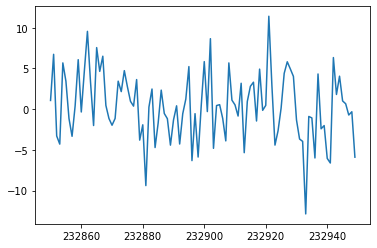

In [80]:
import numpy as np
from numpy import cos
from numpy import pi
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# 2021 Fall - Communications Lab. Project
# Multiagent Communications and Networking Lab.
# Dept. of Electronic and Electrical Engineering
# Ewha Womans University

# import encoded_data(modulated data)
encoded_data = np.loadtxt('./encoded_data.txt')

encoded_data = encoded_data + np.random.normal(0, 4, 1000000)

# parameters
f = 10
time_step = 0.01
num_sample = int(1/time_step)
t = np.arange(0, 1-time_step, time_step)
row = 100
col = 100

# You should write codes for Q1, Q2, Q3, Q4, Q5, and Q6

bet_cnt = 0
flag = False
for data in encoded_data:
    if bet_cnt==0  and format(data, '.3f')=='1.000':
        flag = True
    if bet_cnt!=0  and format(data, '.3f')=='1.000':
        break
    
    if flag == True:
        bet_cnt += 1

# 10
print(bet_cnt)


# Q1
cnt = 0
flag = False
for idx, data in enumerate(encoded_data):
    if format(data, '.3f')=='-1.000':
        if cnt % bet_cnt != 0:
            print(idx)
            break
        flag = True
    if flag == True:
        cnt += 1


a = np.arange(232850, 232950, 1)
plt.figure()
plt.plot(a, encoded_data[a])
plt.show()

In [81]:
t2 = np.arange(0, time_step*row*col*num_sample, time_step)
x = cos(2*pi*f*t2+pi)
b = encoded_data*x

In [82]:
integrate = []

s = 0
for idx, data in enumerate(b):
    s += data
    if idx!=0 and idx % 100 == 0:
        integrate.append(s/2.0)
        s = 0
integrate.append(s/2.0)

print(len(integrate))

10000


In [83]:
integrate_np = np.array(integrate).reshape(100,100)
print(integrate_np.shape)

(100, 100)


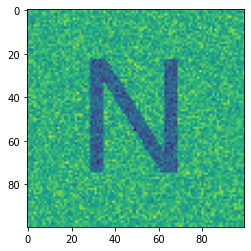

In [84]:
plt.imshow(integrate_np)
plt.show()

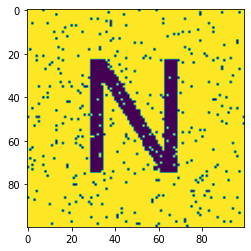

In [86]:
for i in range(len(integrate_np)):
    for j in range(len(integrate_np[i])):
        if integrate_np[i][j]>=0:
            integrate_np[i][j] = 1
        else:
            integrate_np[i][j] = -1

plt.imshow(integrate_np)
plt.show()

68355
176565
257242
309221
343175
367676
385503
399821
409950
418961


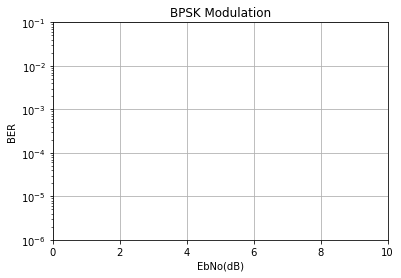

In [117]:
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc #erfc/Q function

# import encoded_data(modulated data)
encoded_data = np.loadtxt('./encoded_data.txt')
t2 = np.arange(0, time_step*row*col*num_sample, time_step)
x = cos(2*pi*f*t2+pi)
b = encoded_data*x
th_encoded_data = b
for i in range(len(th_encoded_data)):
    if th_encoded_data[i]>=0:
        th_encoded_data[i] = 1
    else:
        th_encoded_data[i] = -1

for sigma in range(1, 11):
    data_list = []
    for i in range(10):
        data_list.append(encoded_data + np.random.normal(0, sigma, 1000000))

    normalized_data = sum(data_list)/10.0
    t2 = np.arange(0, time_step*row*col*num_sample, time_step)
    x = cos(2*pi*f*t2+pi)
    b = normalized_data*x
    th_norm_data = b
    for i in range(len(th_norm_data)):
        if th_norm_data[i]>=0:
            th_norm_data[i] = 1
        else:
            th_norm_data[i] = -1

    N = 1000000
    EbNodB_range = range(1,11)
    itr = len(EbNodB_range)
    ber = [None]*itr

    x = th_encoded_data
    y = th_norm_data
    errors = (x != y).sum()
    print(errors)
    ber[sigma-1] = 1.0 * errors / N

            
plt.plot(EbNodB_range, ber, 'bo', EbNodB_range, ber, 'k')
plt.axis([0, 10, 1e-6, 0.1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.show()




In [104]:
print(encoded_data)

[-1.         -0.80901699 -0.30901699 ...  0.30901699 -0.30901699
 -0.80901699]


In [105]:
print(normalized_data)

[-1.3086719  -0.52158705 -0.08967327 ...  0.59601983 -0.72481763
 -0.84987691]


In [107]:
x = [1, 2, 3, 4, 5]
y = [1, 1, 3, 1, 5]
(x!=y).sum()

AttributeError: 'bool' object has no attribute 'sum'

EbNodB: 0
Error bits: 392813
Error probability: 0.0785626
EbNodB: 1
Error bits: 282265
Error probability: 0.056453
EbNodB: 2
Error bits: 187364
Error probability: 0.0374728
EbNodB: 3
Error bits: 114821
Error probability: 0.0229642
EbNodB: 4
Error bits: 62550
Error probability: 0.01251
EbNodB: 5
Error bits: 29565
Error probability: 0.005913
EbNodB: 6
Error bits: 11994
Error probability: 0.0023988
EbNodB: 7
Error bits: 3913
Error probability: 0.0007826
EbNodB: 8
Error bits: 974
Error probability: 0.0001948
EbNodB: 9
Error bits: 161
Error probability: 3.22e-05
EbNodB: 10
Error bits: 22
Error probability: 4.4e-06


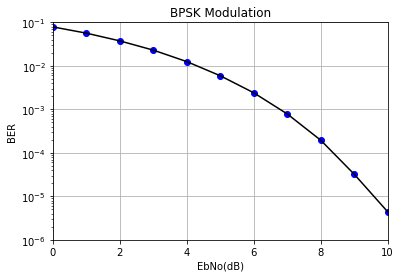

In [114]:
from numpy import sqrt
from numpy.random import rand, randn
import matplotlib.pyplot as plt
  
N = 5000000
EbNodB_range = range(0,11)
itr = len(EbNodB_range)
ber = [None]*itr

for n in range (0, itr): 
 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    x = 2 * (rand(N) >= 0.5) - 1
    noise_std = 1/sqrt(2*EbNo)
    y = x + noise_std * randn(N)
    y_d = 2 * (y >= 0) - 1
    errors = (x != y_d).sum()
    ber[n] = 1.0 * errors / N
    
    print("EbNodB:", EbNodB)
    print("Error bits:", errors)
    print("Error probability:", ber[n])
        
plt.plot(EbNodB_range, ber, 'bo', EbNodB_range, ber, 'k')
plt.axis([0, 10, 1e-6, 0.1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.show()